In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pymysql

In [4]:
db_connection = pymysql.connect(host="localhost",user="root",password="root",database="DINESH")

In [5]:
db_connection

In [6]:
data=pd.read_sql_query("""select * from Walmart""",db_connection,parse_dates=True)

C:\Users\svani\AppData\Local\Temp\ipykernel_5308\2666595371.py:1: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  data=pd.read_sql_query("""select * from Walmart""",db_connection,parse_dates=True)


In [7]:
data.head()

,OrderID,OrderDate,ShipDate,Status,CustomerName,Country,City,State,Category,ProductName,Sales,Quantity,Profit
0,CA-2013-138688,2013-06-13,2013-06-17,On time,DarrinVanHuff,United States,Los Angeles,California,Labels,Self-Adhesive Address Labels for Typewriters b...,14.62,2,6.87
1,CA-2011-115812,2013-06-14,2013-06-18,Delay,BrosinaHoffman,United States,Los Angeles,California,Furnishings,Eldon Expressions Wood and Plastic Desk Access...,48.86,7,14.17
2,CA-2011-115812,2013-06-15,2013-06-19,Delay,BrosinaHoffman,United States,Los Angeles,California,Art,Newell 322,7.28,4,1.97
3,CA-2011-115812,2013-06-16,2013-06-20,Delay,BrosinaHoffman,United States,Los Angeles,California,Phones,Mitel 5320 IP Phone VoIP phone,907.15,4,90.72
4,CA-2011-115812,2013-06-17,2013-06-21,Delay,BrosinaHoffman,United States,Los Angeles,California,Binders,DXL Angle-View Binders with Locking Rings by S...,18.50,3,5.78


In [8]:
data.tail()

,OrderID,OrderDate,ShipDate,Status,CustomerName,Country,City,State,Category,ProductName,Sales,Quantity,Profit
3092,CA-2013-125794,2022-03-16,2022-03-20,On time,MarisLaWare,United States,Los Angeles,California,Accessories,Memorex Mini Travel Drive 64 GB USB 2.0 Flash ...,36.24,1,15.22
3093,CA-2014-121258,2022-03-17,2022-03-21,Delay,DaveBrooks,United States,Costa Mesa,California,Furnishings,Tenex B1-RE Series Chair Mats for Low Pile Car...,91.96,2,15.63
3094,CA-2014-121258,2022-03-18,2022-03-22,Delay,DaveBrooks,United States,Costa Mesa,California,Phones,Aastra 57i VoIP phone,258.58,2,19.39
3095,CA-2014-121258,2022-03-19,2022-03-23,Delay,DaveBrooks,United States,Costa Mesa,California,Paper,"It's Hot Message Books with Stickers, 2 3/4"" x...",29.60,4,13.32
3096,CA-2014-119914,2022-03-20,2022-03-24,Delay,ChrisCortes,United States,Westminster,California,Appliances,"Acco 7-Outlet Masterpiece Power Center, Wihtou...",243.16,2,72.95


In [16]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3097 entries, 0 to 3096
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   OrderID       3097 non-null   object 
 1   OrderDate     3097 non-null   object 
 2   ShipDate      3097 non-null   object 
 3   Status        3097 non-null   object 
 4   CustomerName  3097 non-null   object 
 5   Country       3097 non-null   object 
 6   City          3097 non-null   object 
 7   State         3097 non-null   object 
 8   Category      3097 non-null   object 
 9   ProductName   3097 non-null   object 
 10  Sales         3097 non-null   float64
 11  Quantity      3097 non-null   int64  
 12  Profit        3097 non-null   float64
dtypes: float64(2), int64(1), object(10)
memory usage: 314.7+ KB


In [17]:
data.describe()

,Sales,Quantity,Profit
count,3097.00000,3097.000000,3097.000000
mean,230.33486,3.819826,34.229587
std,532.50479,2.264307,176.887471
min,0.99000,1.000000,-3399.980000
25%,19.44000,2.000000,3.840000
50%,61.12000,3.000000,11.210000
75%,218.35000,5.000000,33.590000
max,13999.96000,14.000000,6719.980000


In [18]:
data.shape

(3097, 13)

In [20]:
data.isna().sum()

OrderID         0
OrderDate       0
ShipDate        0
Status          0
CustomerName    0
Country         0
City            0
State           0
Category        0
ProductName     0
Sales           0
Quantity        0
Profit          0
dtype: int64

In [29]:
data.count()

OrderID         3097
OrderDate       3097
ShipDate        3097
Status          3097
CustomerName    3097
Country         3097
City            3097
State           3097
Category        3097
ProductName     3097
Sales           3097
Quantity        3097
Profit          3097
dtype: int64

In [30]:
data.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
3092    False
3093    False
3094    False
3095    False
3096    False
Length: 3097, dtype: bool

In [32]:
data.value_counts('Status')

Status
On time    1850
Delay      1247
Name: count, dtype: int64

In [34]:
data.value_counts('Country')

Country
United States    3097
Name: count, dtype: int64

In [43]:
data.value_counts('City').head()

City
Los Angeles      731
San Francisco    493
Seattle          411
San Diego        166
Phoenix           61
Name: count, dtype: int64

In [41]:
data.value_counts('State').head()

State
California    1941
Washington     486
Arizona        216
Colorado       178
Oregon         120
Name: count, dtype: int64

In [46]:
data.value_counts('Sales').head()

Sales
12.96     26
19.44     20
32.40     13
25.92      9
302.38     9
Name: count, dtype: int64

In [50]:
data.value_counts('Profit').head()

Profit
6.22     25
9.33     20
0.00     20
15.55    11
3.11      9
Name: count, dtype: int64

In [52]:
data.value_counts('ProductName')

ProductName
Staples                                                                  60
Avery Non-Stick Binders                                                   8
Cardinal Slant-D Ring Binder, Heavy Gauge Vinyl                           7
SAFCO Arco Folding Chair                                                  7
Xerox 225                                                                 7
                                                                         ..
Lexmark MX611dhe Monochrome Laser Printer                                 1
Linden 12" Wall Clock With Oak Frame"                                     1
Logitech G430 Surround Sound Gaming Headset with Dolby 7.1 Technology     1
Advantus Panel Wall Acrylic Frame                                         1
#10 Self-Seal White Envelopes                                             1
Name: count, Length: 1447, dtype: int64

In [56]:
data.sort_values(by='Sales', ascending=False).head()

,OrderID,OrderDate,ShipDate,Status,CustomerName,Country,City,State,Category,ProductName,Sales,Quantity,Profit
2574,CA-2014-140151,2020-09-27,2020-10-01,On time,RaymondBuch,United States,Seattle,Washington,Copiers,Canon imageCLASS 2200 Advanced Copier,13999.96,4,6719.98
768,CA-2011-143917,2015-08-21,2015-08-25,On time,KenLonsdale,United States,San Francisco,California,Supplies,High Speed Automatic Electric Letter Opener,8187.65,5,327.51
2750,CA-2014-135909,2021-03-29,2021-04-02,Delay,JaneWaco,United States,Sacramento,California,Binders,Fellowes PB500 Electric Punch Plastic Comb Bin...,5083.96,5,1906.49
1848,CA-2013-136301,2018-09-08,2018-09-12,On time,EdwardHooks,United States,San Francisco,California,Supplies,High Speed Automatic Electric Letter Opener,4912.59,3,196.50
1271,CA-2014-149881,2017-01-22,2017-01-26,On time,NickCrebassa,United States,San Francisco,California,Machines,Cubify CubeX 3D Printer Double Head Print,4799.98,2,360.00


In [57]:
data.sort_values(by='Sales', ascending=False).tail()

,OrderID,OrderDate,ShipDate,Status,CustomerName,Country,City,State,Category,ProductName,Sales,Quantity,Profit
2229,CA-2011-143168,2019-10-09,2019-10-13,Delay,IvanGibson,United States,Seattle,Washington,Binders,Computer Printout Index Tabs,1.34,1,0.47
1926,US-2014-162068,2018-11-29,2018-12-03,On time,PamelaCoakley,United States,Loveland,Colorado,Binders,Avery Reinforcements for Hole-Punch Pages,1.19,2,-0.99
1522,CA-2012-106978,2017-10-06,2017-10-10,Delay,ZuschussCarroll,United States,Aurora,Colorado,Binders,Wilson Jones Easy Flow II Sheet Lifters,1.08,2,-0.79
286,US-2014-100209,2014-04-04,2014-04-08,Delay,TamaraDahlen,United States,Portland,Oregon,Binders,Wilson Jones Easy Flow II Sheet Lifters,1.08,2,-0.79
844,CA-2014-126536,2015-11-09,2015-11-13,On time,NeilKnudson,United States,San Francisco,California,Accessories,Maxell 4.7GB DVD-R 5/Pack,0.99,1,0.44


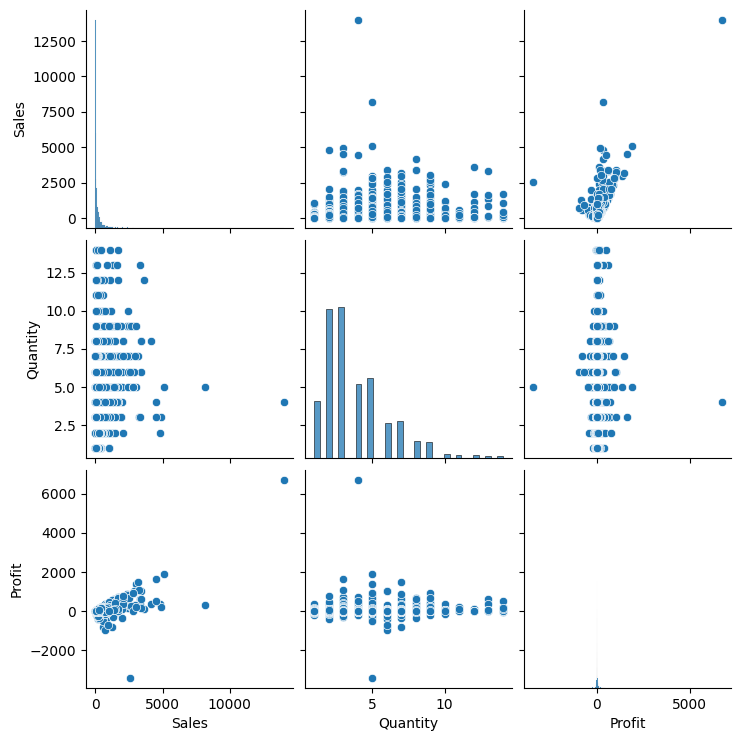

In [21]:
sns.pairplot(data)

<Axes: ylabel='count'>

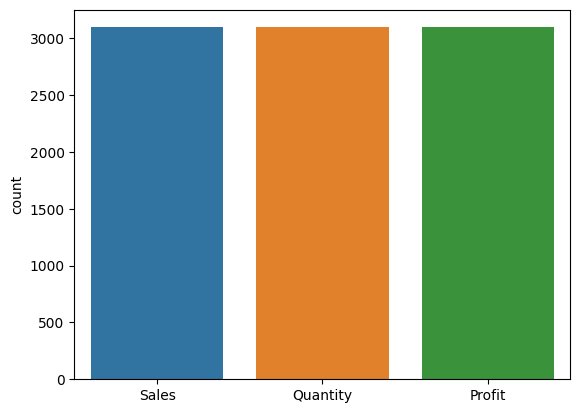

In [25]:
sns.countplot(data)